In [1]:
#All the import files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [4]:
# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the dataset's filename or path

In [5]:
data = pd.read_csv('heart.csv')

In [6]:
# Step 2: Basic Data Exploration

In [7]:
print("Data Shape:", data.shape)

Data Shape: (303, 14)


In [8]:
print("Data Columns:", data.columns)

Data Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [9]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
print("Data Summary:\n", data.describe())

Data Summary:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.5

In [11]:
print("Data Types:\n", data.dtypes)

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [12]:
# Step 3: Data Preprocessing
# Handling missing values (e.g., filling with mean for simplicity)

In [13]:
data.fillna(data.mean(), inplace = True)

In [14]:
# Encoding categorical variables if any

In [15]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoder[column] = le # save encoder for potential use later

In [16]:
## Feature Scaling

In [17]:
scaler = StandardScaler()
features = data.drop(columns=['target'])  # Replace 'target' if your dataset uses a different name
target = data['target']
features = scaler.fit_transform(features)

In [18]:
# Convert scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(features, columns=data.drop(columns=['target']).columns)

In [19]:
# Display the first few rows of the scaled data
print(scaled_features_df.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  


In [20]:
# Step 4: Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [22]:
#Below this things will change as per the model used

In [23]:
# Step 5: Model Training

In [24]:
## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Step 6: Model Evaluation

In [28]:
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[24  5]
 [ 5 27]]


In [29]:
#Precision: The proportion of true positive predictions among all positive predictions (i.e., how many of the predicted positives are actually positive).
#Recall: The proportion of true positive predictions among all actual positives (i.e., how many of the actual positives were predicted correctly).
#F1-Score: The harmonic mean of precision and recall, balancing both metrics.
#Accuracy: The overall percentage of correct predictions.

#Confusion Matrix:
# [[TN  FP]
# [ FN TP]]
#(TP): The model correctly predicted the positive class (e.g., heart disease = 1). This is the value at position [1, 1]
#(TN): The model correctly predicted the negative class (e.g., no heart disease = 0). This is the value at position [0, 0] 
#(FP): The model incorrectly predicted the positive class when it should have predicted negative (e.g., predicted heart disease when there wasn't any). This is the value at position [0, 1]
#(FN): The model incorrectly predicted the negative class when it should have predicted positive (e.g., predicted no heart disease when there actually was). This is the value at position [1, 0] 

In [30]:
# Calculate ROC-AUC score
y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9202586206896552


In [31]:
#ROC-AUC stands for Receiver Operating Characteristic - Area Under the Curve:
#ROC Curve: A graphical representation of the model's performance at different classification thresholds (ranging from 0 to 1). It plots the True Positive Rate (TPR, also called recall) against the False Positive Rate (FPR).
#AUC (Area Under the Curve): A single value that represents the overall ability of the model to distinguish between positive and negative classes. The value ranges from 0 to 1:
#AUC = 0.5: The model is no better than random chance.
#AUC = 1: The model is perfect at distinguishing between the positive and negative classes.
#Higher AUC values indicate better performance.

In [32]:
# Step 7: Visualization

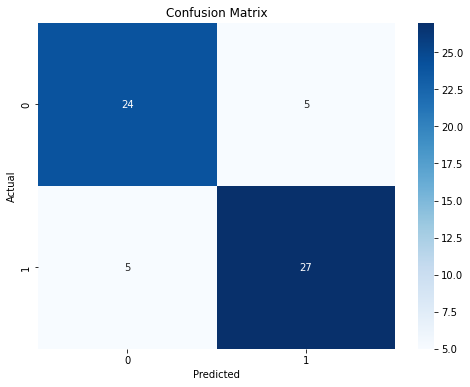

In [33]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

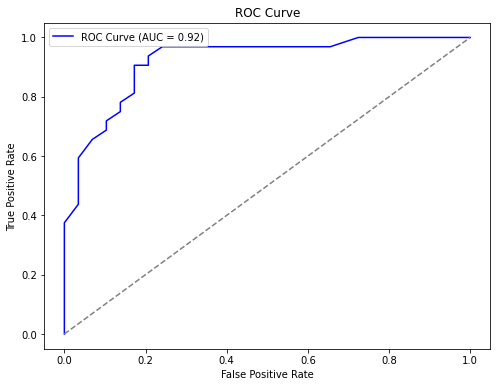

In [34]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()